<a href="https://colab.research.google.com/github/shilparbhagat/ML-Project/blob/main/Yes_Bank_Stock_closing_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction






##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Shilpa Pradip Patil
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

In this dataset  we are having Yes bank stock price details. This dataset contains five columns such as Date column,Open column,High Column,Low column,Close column and 185 rows of data in this we get information from year 2005 to 2020.

In this project we plot various  charts to understand relations between variables and by using the plot and  insights  we found which helps us to create business impact

In this project our main goal is to find best ML algorithm which gives us best result


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Analyse the databse and find best ML algorithm for this databse to get best result

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSet/Copy of data_YesBank_StockPrices.csv'

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df=pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df1=df.isnull().sum()

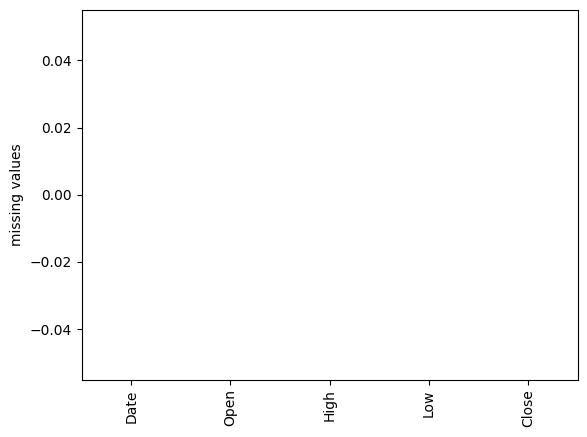

In [8]:
# Visualizing the missing values
df1.plot(kind='bar')
plt.ylabel("missing values")
plt.show()

### What did you know about your dataset?

This database contains 5 columns such as Date,Open,High,Low,Close. In this dataset, it contains data from Years 2005 to 2020 without any null values

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

This Dataset Contains 5 Variables such as:

Date: This column contains month and year

Open: Stocks opening price for particular Date

High: Stocks Highest price for particular Date

Low: Stocks Lowest price for particular Date

Close: Stocks Closing price for particular Date

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
df. head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [13]:
# Write your code to make your dataset analysis ready.
t=[]
for i in df['Date']:
  t.append(i.split('-')[-1])

df['Year']=t

In [14]:
t=[]
for i in df['Date']:
  t.append(i.split('-')[-2])

df['month']=t

In [15]:
df. head()

,Date,Open,High,Low,Close,Year,month
0,Jul-05,13.00,14.00,11.25,12.46,05,Jul
1,Aug-05,12.58,14.88,12.55,13.42,05,Aug
2,Sep-05,13.48,14.87,12.27,13.30,05,Sep
3,Oct-05,13.20,14.47,12.40,12.99,05,Oct
4,Nov-05,13.35,13.88,12.88,13.41,05,Nov


### What all manipulations have you done and insights you found?

This dataset doesn't contains any null or missing values.

In this dataset Date column contains both month and year in one column so I am adding two more columns in dataset such as month and year which abstract data data from date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [16]:
a = df.groupby(['Year'])[['Close']].mean()
a = a.sort_index(ascending = False)
a

,Close
Year,
20,22.105455
19,125.262500
18,288.637500
17,315.306667
16,213.524167
15,160.112500
14,106.947500
13,80.585000
12,74.281667


Text(0.5, 0, 'Year')

<Figure size 900x300 with 0 Axes>

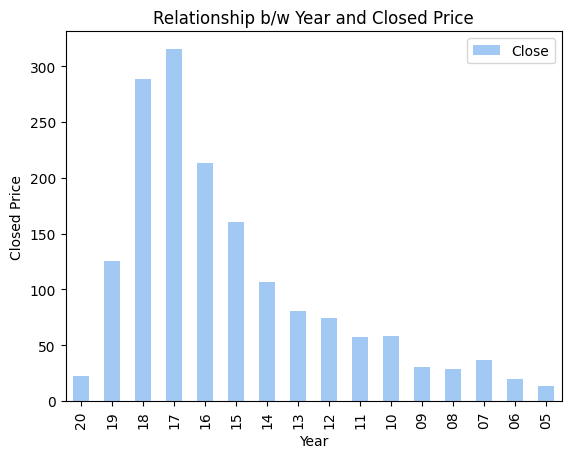

In [17]:
plt.figure(figsize = (9,3))
a.plot(kind = 'bar',color = sns.color_palette('pastel'))
plt.title('Relationship b/w Year and Closed Price')
plt.ylabel('Closed Price')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

A bar plot uses rectangular bars to repredent data categories.
It is easy to understand the flow of change in data

##### 2. What is/are the insight(s) found from the chart?

From year 2005 to 2017 closing prices for trade are continuously increasing but in year 2020 due to covid Share market crash happended because of this in year 2020 Closing price of Yes bank also decreased

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [18]:
# Chart - 2 visualization code
a = df.groupby(['month'])[['Close']].mean()
a = a.sort_index(ascending = False)
a


,Close
month,
Sep,93.343750
Oct,97.399375
Nov,94.671250
May,112.874667
Mar,113.014000
Jun,109.661333
Jul,108.322500
Jan,108.774667
Feb,107.760667


Text(0.5, 0, 'Month')

<Figure size 900x300 with 0 Axes>

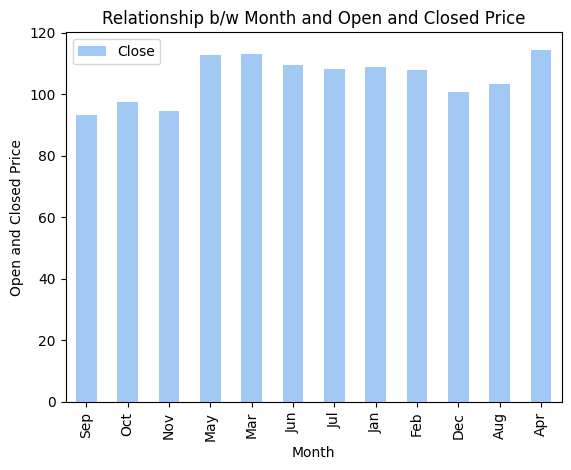

In [19]:
plt.figure(figsize = (9,3))
a.plot(kind = 'bar',color = sns.color_palette('pastel'))
plt.title('Relationship b/w Month and  Closed Price')
plt.ylabel(' Closed Price')
plt.xlabel('Month')

##### 1. Why did you pick the specific chart?

In the previous plot we are using bar chart for average closing price per year,so for getting correlation between average closing values for each month we are again using bar chart

##### 2. What is/are the insight(s) found from the chart?

In the march,april and may closig prices are higher than other months

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [20]:
# Chart - 3 visualization code
a = df.groupby(['Year'])[['Open','High','Low','Close']].mean()

a

,Open,High,Low,Close
Year,,,,
05,13.183333,14.423333,12.391667,13.215000
06,18.401667,21.090833,16.903333,19.350000
07,35.160833,39.743333,31.830000,36.873333
08,31.292500,34.330833,23.335000,28.252500
09,26.940833,32.678333,24.275833,30.032500
10,57.946667,63.508333,53.880833,58.645833
11,58.865000,63.341667,52.275833,57.223333
12,70.648333,77.577500,67.428333,74.281667
13,82.608333,92.748333,72.990833,80.585000


Text(0.5, 0, 'Year')

<Figure size 900x300 with 0 Axes>

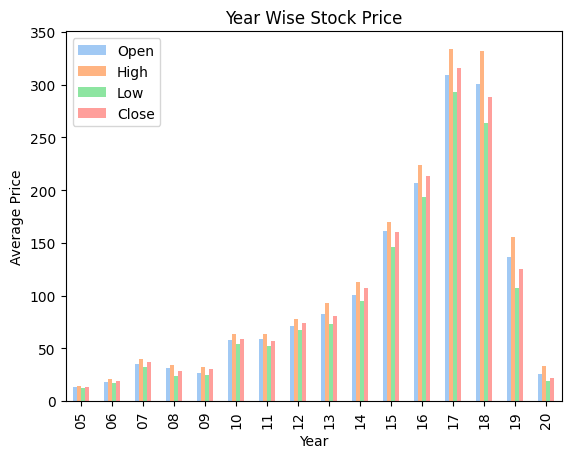

In [21]:
plt.figure(figsize = (9,3))
a.plot(kind = 'bar',color = sns.color_palette('pastel'))
plt.title('Year Wise Stock Price')
plt.ylabel('Average Price')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

Bar plots provide clear and intuitive way to visualise categorical data.

for understand data from 4 different categories such as open,close,high,low for every year we use bar plot

##### 2. What is/are the insight(s) found from the chart?

We can clearly see in the above plot,that from 2005 to 2017 there is increaing trend but in last in 3 year data is continuously falling

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [22]:
# Chart - 4 visualization code
a = df.groupby(['month'])[['Open','High','Low','Close']].mean()
a = a.sort_index(ascending = False)
a

,Open,High,Low,Close
month,,,,
Sep,103.691875,114.283750,85.735625,93.343750
Oct,93.815625,109.928125,85.361875,97.399375
Nov,97.975000,105.645000,87.251875,94.671250
May,114.589333,122.090000,102.404667,112.874667
Mar,108.150667,123.670667,98.524000,113.014000
Jun,113.268000,118.471333,102.642000,109.661333
Jul,103.891250,117.493750,96.206250,108.322500
Jan,100.928000,117.346667,93.766000,108.774667
Feb,109.134667,116.035333,98.238667,107.760667


Text(0.5, 0, 'Months')

<Figure size 2000x800 with 0 Axes>

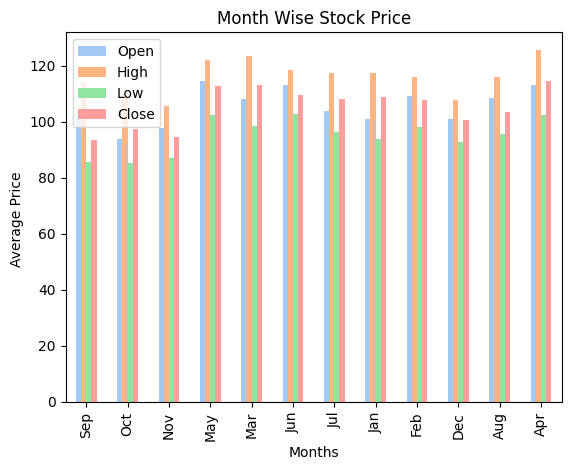

In [23]:
plt.figure(figsize = (20,8))
a.plot(kind = 'bar',color = sns.color_palette('pastel'))
plt.title('Month Wise Stock Price')
plt.ylabel('Average Price ')
plt.xlabel('Months')


##### 1. Why did you pick the specific chart?

In the previous bar chart we use same categories to find trend per year.same as this for find the flow of data per month we again use bar chart

##### 2. What is/are the insight(s) found from the chart?

The above plot shows in the March,April and May stock price are higher as compared to other months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [24]:
# Chart - 5 visualization code
a = df.groupby(['Year'])[['High']].mean()

a

,High
Year,
05,14.423333
06,21.090833
07,39.743333
08,34.330833
09,32.678333
10,63.508333
11,63.341667
12,77.577500
13,92.748333


Text(0.5, 0, 'Year')

<Figure size 900x300 with 0 Axes>

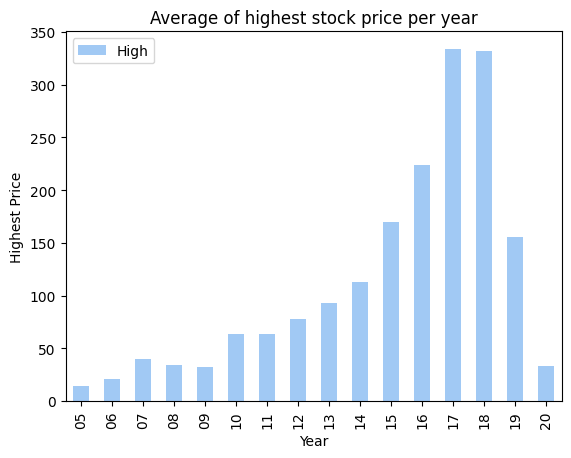

In [25]:
plt.figure(figsize = (9,3))
a.plot(kind = 'bar',color = sns.color_palette('pastel'))
plt.title('Average of highest stock price per year')
plt.ylabel('Highest Price')
plt.xlabel('Year')


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

By using above chat we can clearly see that for year 2017 and 2018  average Highest prices for trades are nealy same but in 2019 and 2020 the average of Highest price dropdown by larger price trades

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [26]:
# Chart - 6 visualization code
a = df.groupby(['Year'])[['Low']].mean()

a

,Low
Year,
05,12.391667
06,16.903333
07,31.830000
08,23.335000
09,24.275833
10,53.880833
11,52.275833
12,67.428333
13,72.990833


Text(0.5, 0, 'Year')

<Figure size 900x300 with 0 Axes>

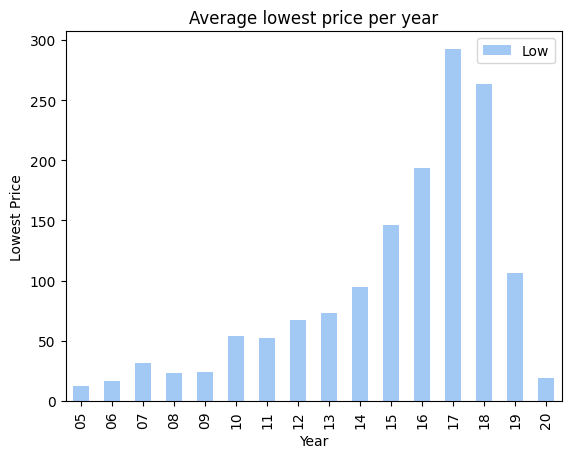

In [27]:
plt.figure(figsize = (9,3))
a.plot(kind = 'bar',color = sns.color_palette('pastel'))
plt.title('Average lowest price per year')
plt.ylabel('Lowest Price')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

In this chart we can clearly see that from 2005 to 2017 the Average lowest price for trades are continuously increasing for continuous 13 years but after that this trend will dropdown by larger price

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [28]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [29]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [30]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [31]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [32]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [33]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [34]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [35]:
# Correlation Heatmap visualization code
df.head()

,Date,Open,High,Low,Close,Year,month
0,Jul-05,13.00,14.00,11.25,12.46,05,Jul
1,Aug-05,12.58,14.88,12.55,13.42,05,Aug
2,Sep-05,13.48,14.87,12.27,13.30,05,Sep
3,Oct-05,13.20,14.47,12.40,12.99,05,Oct
4,Nov-05,13.35,13.88,12.88,13.41,05,Nov


In [36]:
#df['month']=df['month'].astype('category').cat.codes

In [37]:
dt= df[['Open', 'High', 'Low', 'Close', 'Year']]
dt

,Open,High,Low,Close,Year
0,13.00,14.00,11.25,12.46,05
1,12.58,14.88,12.55,13.42,05
2,13.48,14.87,12.27,13.30,05
3,13.20,14.47,12.40,12.99,05
4,13.35,13.88,12.88,13.41,05
...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,20
181,12.00,17.16,11.85,14.37,20
182,14.30,15.34,12.75,13.15,20
183,13.30,14.01,12.11,12.42,20


In [38]:
dt.corr()

,Open,High,Low,Close,Year
Open,1.000000,0.993040,0.983978,0.977971,0.624325
High,0.993040,1.000000,0.983422,0.985051,0.638603
Low,0.983978,0.983422,1.000000,0.995358,0.599056
Close,0.977971,0.985051,0.995358,1.000000,0.608408
Year,0.624325,0.638603,0.599056,0.608408,1.000000


<Axes: >

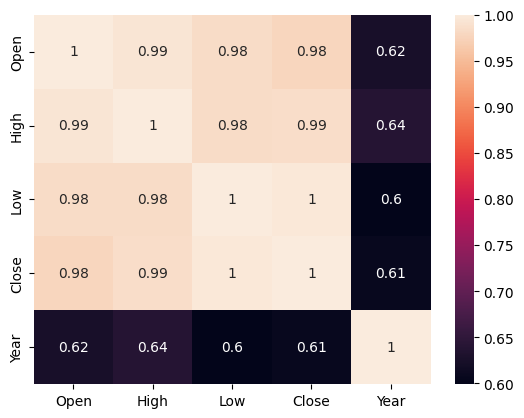

In [39]:
sns.heatmap(dt.corr(),annot = True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

In this we can clearly see that all the four variables are highly correlated with each other

#### Chart - 15 - Pair Plot

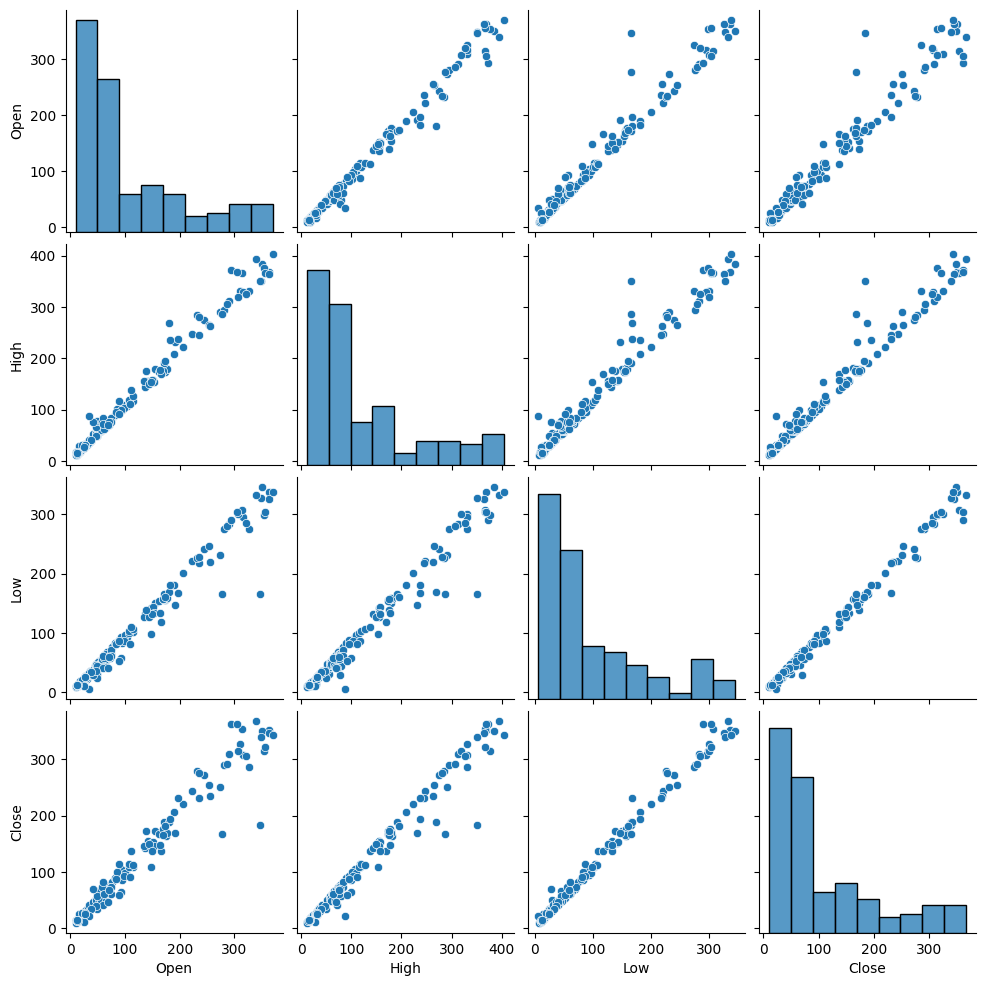

In [40]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
df1=df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [42]:
# Handling Outliers & Outlier treatments
num_features = df.describe().columns
num_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

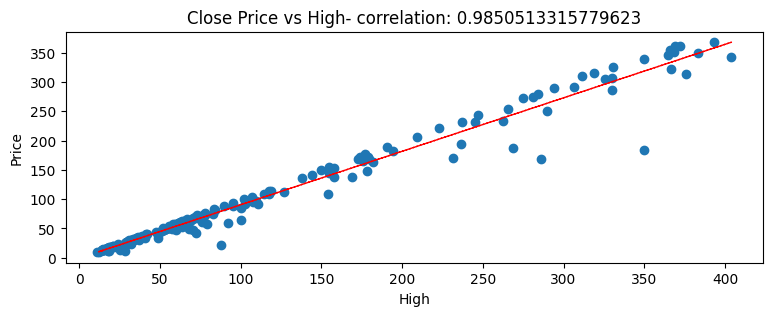

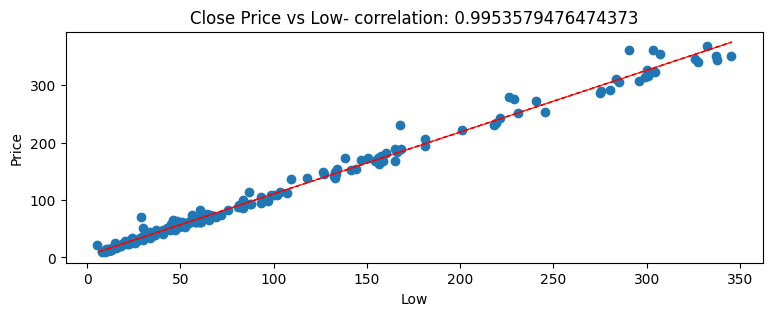

In [43]:
# Correlation & scatter plot 'Rented Bike Count'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,3))
  ax = fig.gca()
  feature =(df[col])
  label = df['Close']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Close Price vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
 5   Year    185 non-null    object 
 6   month   185 non-null    object 
dtypes: float64(4), object(3)
memory usage: 10.2+ KB


In [46]:
df

,Date,Open,High,Low,Close,Year,month
0,Jul-05,13.00,14.00,11.25,12.46,05,Jul
1,Aug-05,12.58,14.88,12.55,13.42,05,Aug
2,Sep-05,13.48,14.87,12.27,13.30,05,Sep
3,Oct-05,13.20,14.47,12.40,12.99,05,Oct
4,Nov-05,13.35,13.88,12.88,13.41,05,Nov
...,...,...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95,20,Jul
181,Aug-20,12.00,17.16,11.85,14.37,20,Aug
182,Sep-20,14.30,15.34,12.75,13.15,20,Sep
183,Oct-20,13.30,14.01,12.11,12.42,20,Oct


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

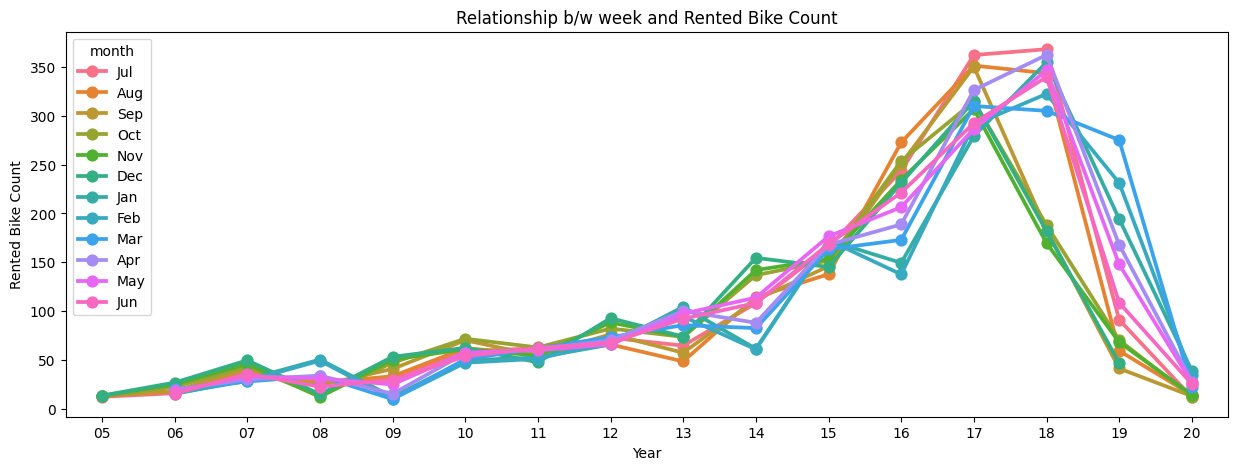

In [48]:
plt.figure(figsize=(15,5))
sns.pointplot(x=df["Year"],y=df['Close'],hue=df['month'])
plt.title('Relationship b/w week and Rented Bike Count')
plt.ylabel('Rented Bike Count')
plt.xlabel

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:
# Expand Contraction

#### 2. Lower Casing

In [50]:
# Lower Casing

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords

In [54]:
# Remove White spaces

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [58]:
# POS Taging

#### 10. Text Vectorization

In [59]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [60]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [61]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [62]:
# Transform Your data

### 6. Data Scaling

In [63]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [64]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [65]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
 5   Year    185 non-null    object 
 6   month   185 non-null    object 
dtypes: float64(4), object(3)
memory usage: 10.2+ KB


In [67]:
df = pd.get_dummies(df,drop_first=True,sparse=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Columns: 214 entries, Open to month_Sep
dtypes: Sparse[bool, False](210), float64(4)
memory usage: 8.5 KB


In [68]:
df.head()

,Open,High,Low,Close,Date_Apr-07,Date_Apr-08,Date_Apr-09,Date_Apr-10,Date_Apr-11,Date_Apr-12,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,13.00,14.00,11.25,12.46,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,12.58,14.88,12.55,13.42,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13.48,14.87,12.27,13.30,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,13.20,14.47,12.40,12.99,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,13.35,13.88,12.88,13.41,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [69]:
x = df.drop('Close',axis = 1)
y = df['Close']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [72]:
scal = PowerTransformer()
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

## **Import Dependancy**

In [73]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**Create a function for scores**

In [74]:
# Appending all models parameters to the corrosponding list
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)



  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')



  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 1.0
MAE : 26.575236256846644
MSE : 1281.6314636148886
RMSE : 35.799880776545734
R2 : 0.8582083079725537
Adjusted R2 :  1.0288389882089721 

********************************************************************************
coefficient 
 [ 1.76430240e+01  1.79597763e+01  1.86647129e+01 -1.01725772e+00
 -1.53854814e+00 -3.55271368e-15 -1.30970755e+00 -1.11022302e-15
 -1.86330183e+00 -3.62641222e-01 -1.51287880e+00  8.88178420e-16
  3.68251473e-01  5.83583973e+00  9.68392426e+00  1.77635684e-15
 -9.99845521e-01 -7.27076883e-01 -6.03254504e-01 -1.57660457e+00
 -1.33094449e+00 -1.86986813e+00 -1.77449915e+00 -1.98674813e+00
 -2.22065700e+00 -3.55271368e-15 -6.07477495e-01 -1.38671047e+00
  5.38799398e+00  7.13243534e+00  7.39189425e+00 -3.97398318e+00
  1.43977091e-01 -2.87736764e-01 -1.27554129e+00  4.44089210e-16
  1.07751761e+00 -1.82946455e+00 -1.18544094e+00 -1.77897463e+00
 -6.19889594e-01 -1.39402615e+00  0.00000000e+00 -2.01921016e-01
  2.91102983e+00  5.36113764e+00

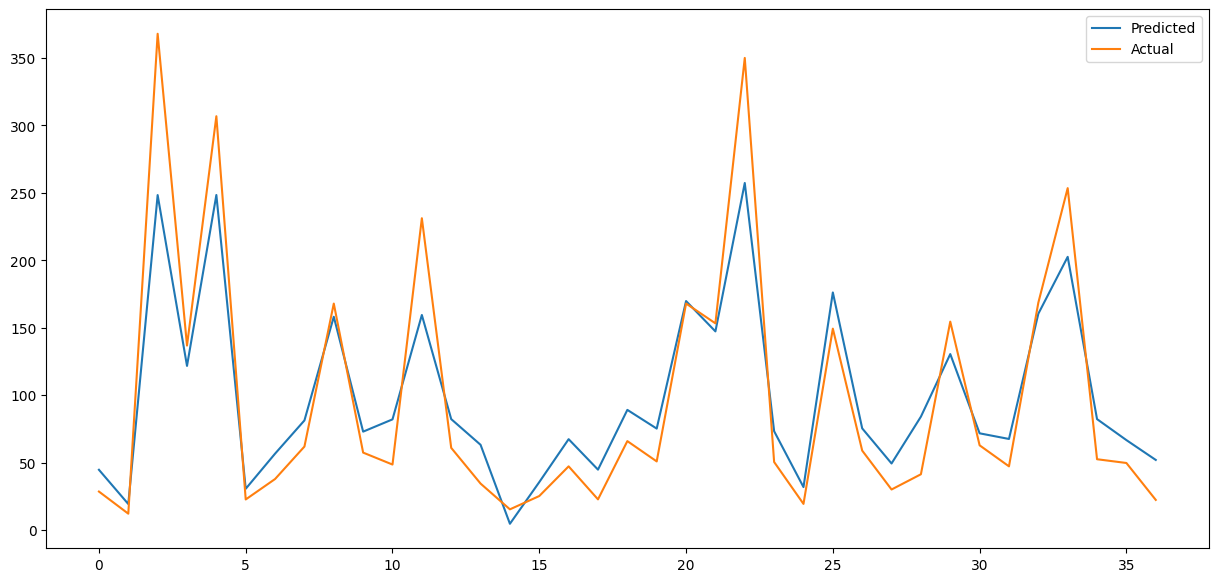

In [75]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For ML model implementaion first I use Linear regression model.In machine learning, linear regression uses a linear equation to model the relationship between a dependent variable (Y) and one or more independent variables (Y).





#### 2. Cross- Validation & Hyperparameter Tuning

### **Lasso with hyperparameter tuning**

In [76]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.309e+02, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.999e+02, tolerance: 1.080e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e+02, tolerance: 1.156e

Training score  = 0.938186237172225
MAE : 21.915677012336022
MSE : 852.5610808301062
RMSE : 29.198648613079786
R2 : 0.9056779724596604
Adjusted R2 :  1.0191841411946454 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


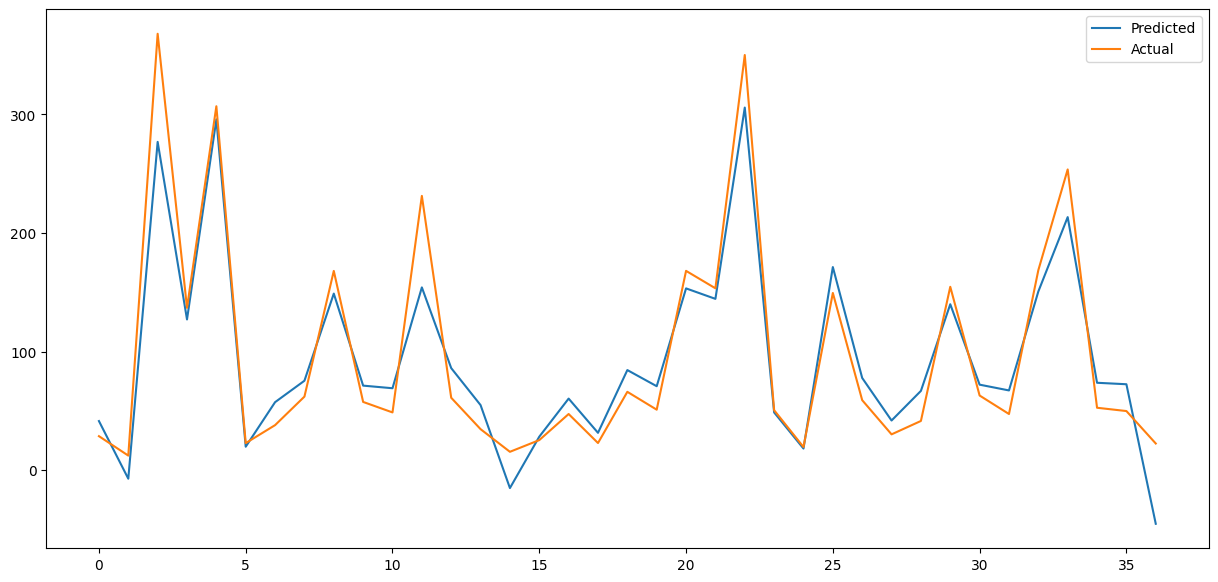

In [77]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Training score  = 1.0
MAE : 26.575236256846654
MSE : 1281.631463614891
RMSE : 35.79988077654576
R2 : 0.8582083079725533
Adjusted R2 :  1.0288389882089721 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


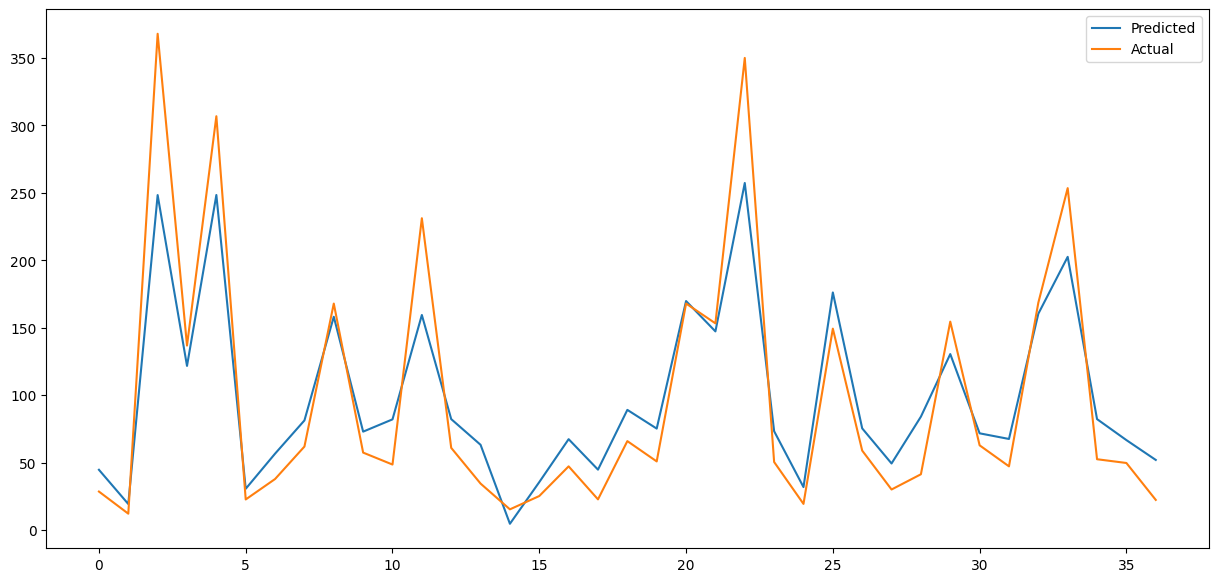

In [78]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

In [79]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Here we are using Lasso and Ridge hyperparameter tuning techniques using GrideSearch CV

Lasso Regression is a regularization technique used to prevent overfitting.

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

### **Polynomial**

In [80]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

#### **LinearRegression**

Training score  = 1.0
MAE : 73.2867250940863
MSE : 7655.071768589693
RMSE : 87.49326699003583
R2 : 0.1530907211045004
Adjusted R2 :  1.0013273862179564 

********************************************************************************
coefficient 
 [ 8.32667268e-16  4.60319872e-01  4.62921762e-01 ... -6.55014404e-02
  1.78842861e-02 -1.19443172e-01]


Intercept  =  104.71622706813012


******************** ploting the graph of Actual and predicted only with 80 observation ********************


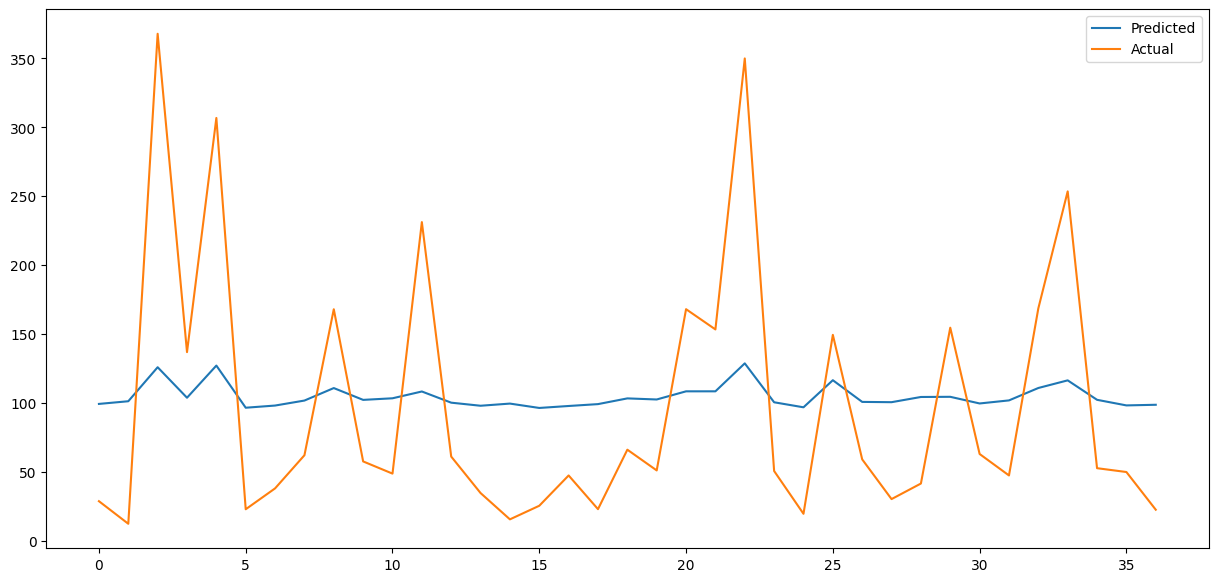

In [81]:
score_metrix(LinearRegression(), x_train_poly,x_test_poly,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here we are using Polynomial,this is a type of regression analysis used in statistics and machine learning when the relationship between the independent variable (input) and the dependent variable (output) is not linear.

#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

### **Train Test split for Tree Base Models**
**because multicollinearty not effect tree base models**

Training score  = 1.0
MAE : 10.185675675675675
MSE : 270.2678675675676
RMSE : 16.439825655023462
R2 : 0.9700992529202058
Adjusted R2 :  1.006081507880636 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


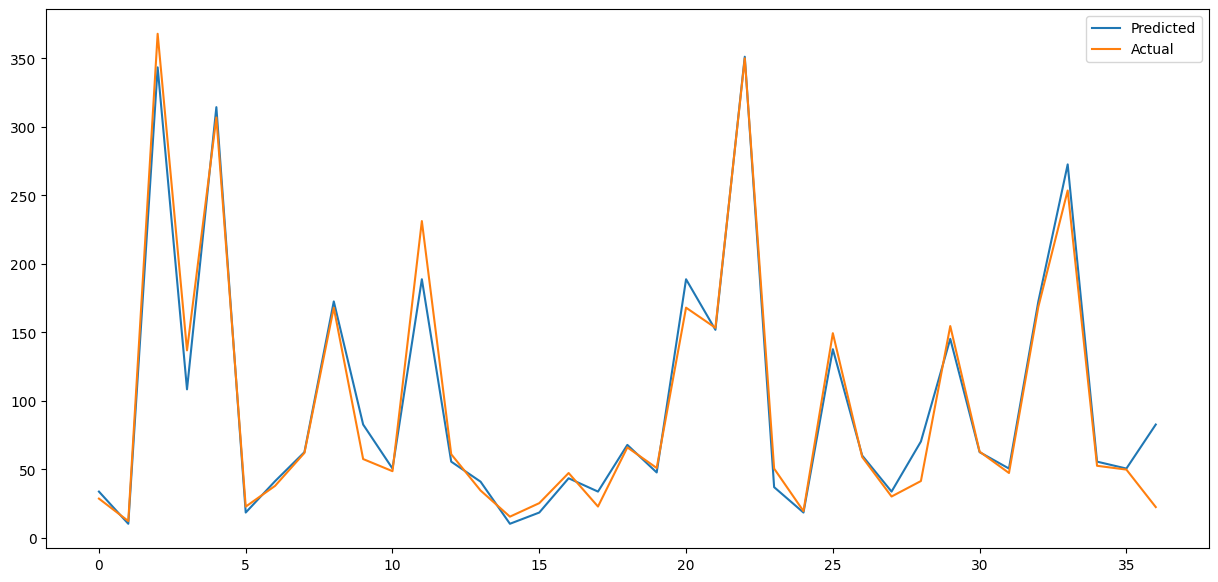

In [83]:
d_tree = DecisionTreeRegressor()
score_metrix(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

### **Using Random Forest Regressor**

Training score  = 0.9983626276634953
MAE : 8.656102702702672
MSE : 185.48959684486448
RMSE : 13.61945655468178
R2 : 0.9794785907362639
Adjusted R2 :  1.0041738459519463 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


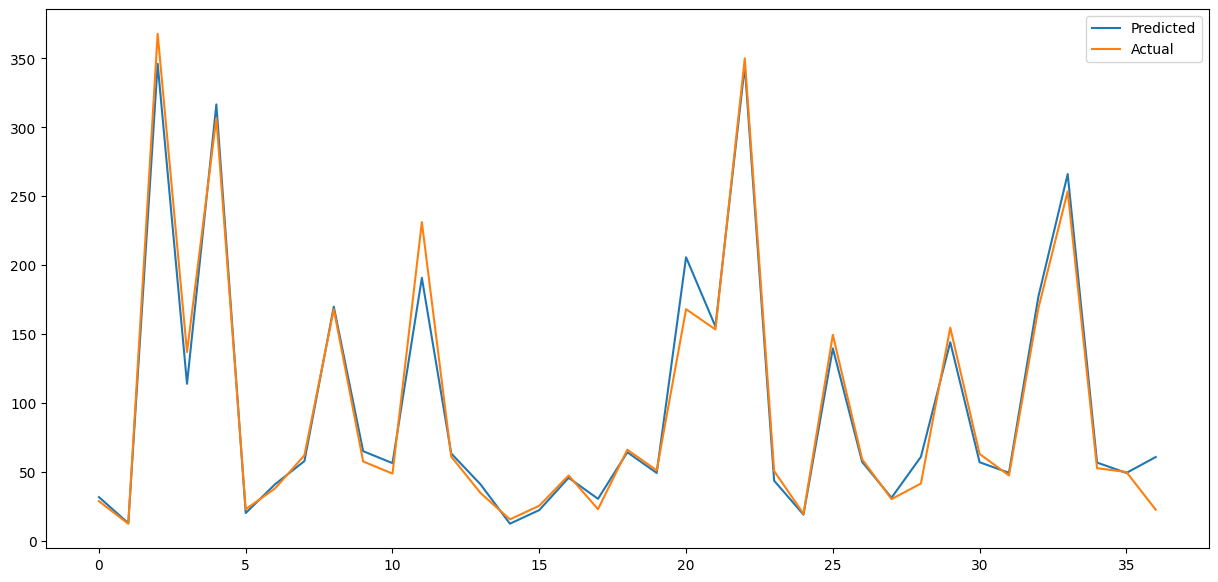

In [84]:
score_metrix(RandomForestRegressor(),x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here we are using Random Forest regression, which is a powerful machine learning technique used for predicting numerical values. It leverages the collective intelligence of multiple decision trees to improve accuracy and reduce overfitting.


#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From all of the above models ,Lasso with hyperparameter tuning gives us 93 percent of accuracy

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

In this ML project,we import the different libraries and understand the Dataset.We perform data visualization by creating different types of charts by using this we understand the relations between the variables.after that we implement some ML models.

firstly we create linear regression model with lasso and ridge hyperparameter tuning,in this model we get 93 percent accuracy in lasso hyperparameter tuning.

Next we use Polynomial, in this model it gives us 1 percent of accuracy so this model is overfitting

Next we use Random Forest regression ,in this model it gives us 99 percent of accuracy.

so,from this all models Lasso with hyperparameter tuning gives us best result of 93 percent

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***